<h3>Задача 1</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets, metrics, cross_validation
from matplotlib.colors import ListedColormap

/home/pavel/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Описываем глобальные параметры. Будем считать accuracy для всех значений k от 1 до k_max. N - размер выборки, num_of_klasses - число классов.

In [2]:
k_max = 30 
N = 1000
num_of_klasses = 4 

Генерируем данные и рисуем их.

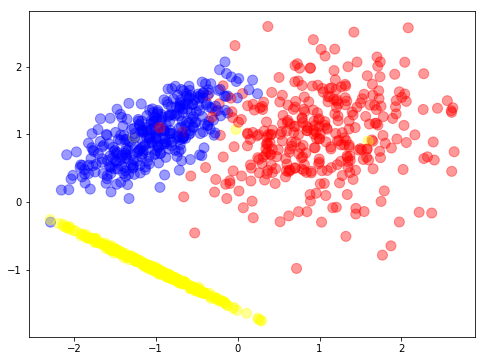

In [3]:
Data = datasets.make_classification(n_samples=N, n_features =2, n_informative = 2,
                                                      n_classes = 3, n_redundant=0,
                                                      n_clusters_per_class=1, random_state=3)

train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(Data[0],
                                                                                     Data[1],
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
plt.figure(figsize=(8,6))
plt.scatter(map(lambda x: x[0], Data[0]), map(lambda x: x[1], Data[0]),
              c=Data[1], cmap=colors, s=100, alpha = 0.4)
plt.show()

Визуализируем разделяющие поверхности для разных значений k.

k = 1


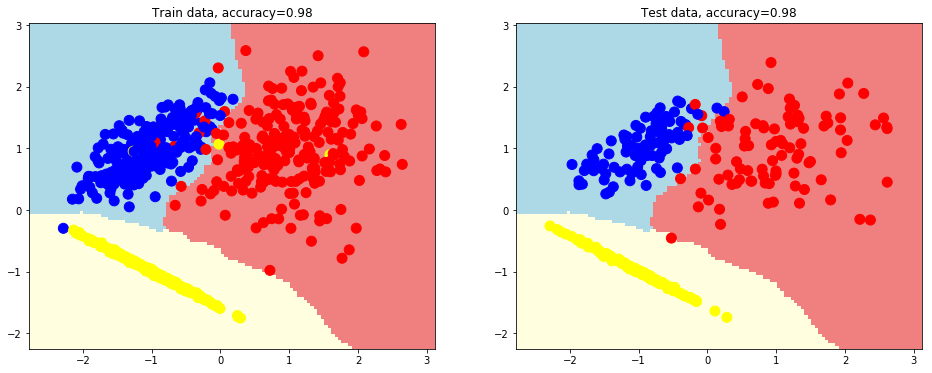

k = 3


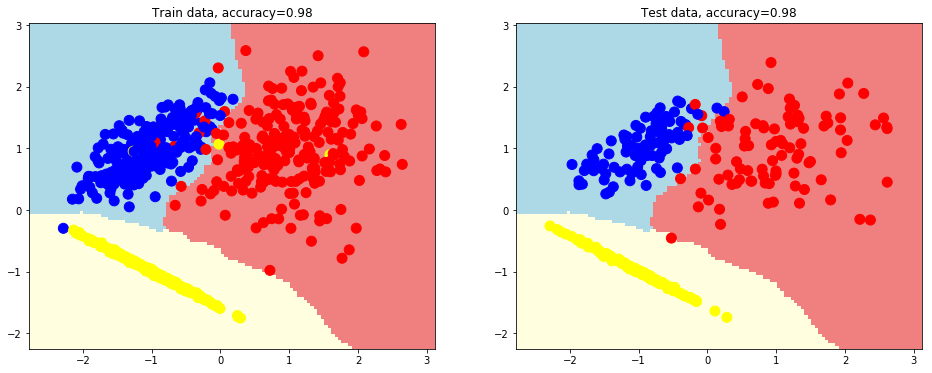

k = 5


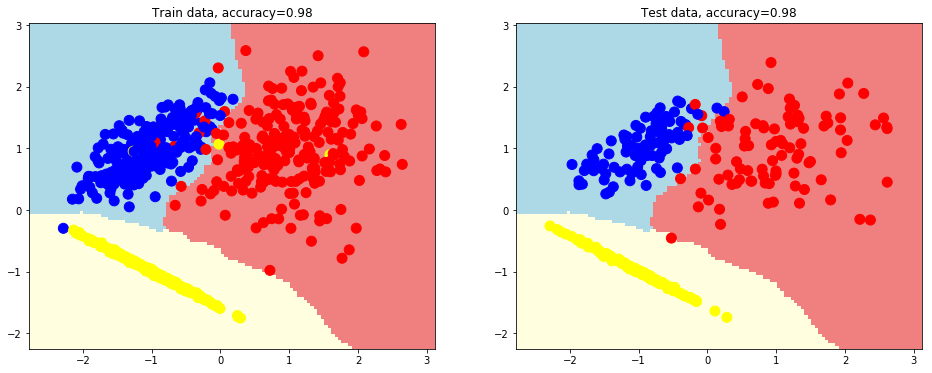

k = 10


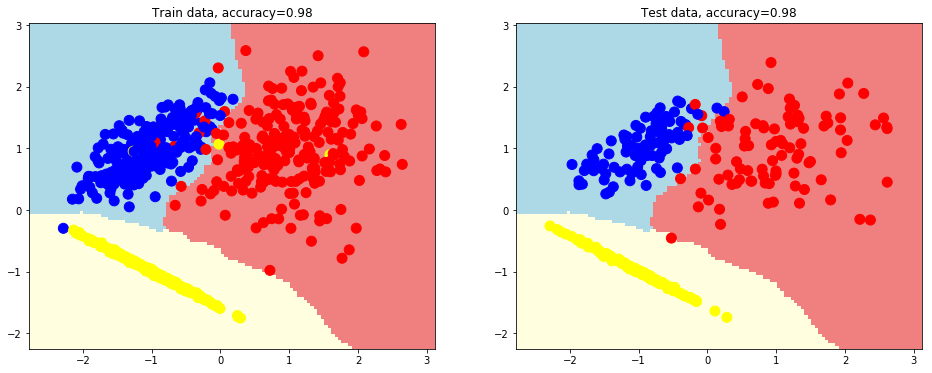

k = 20


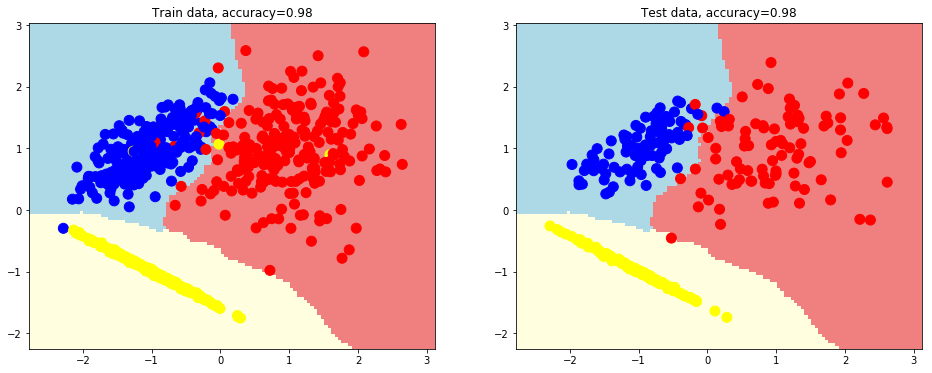

k = 30


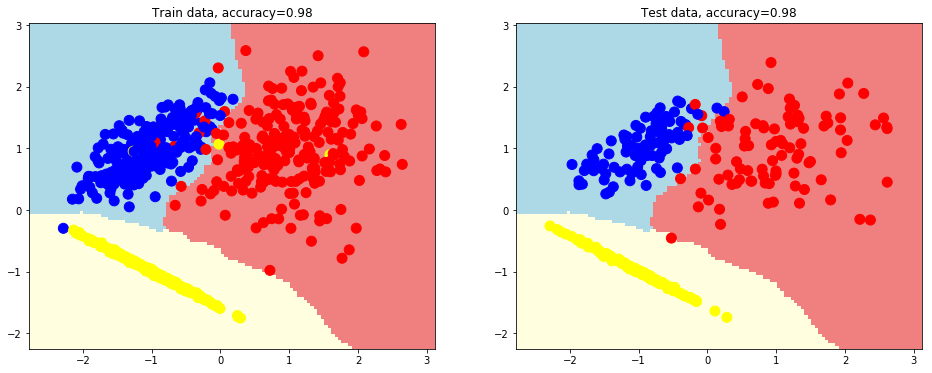

k = 50


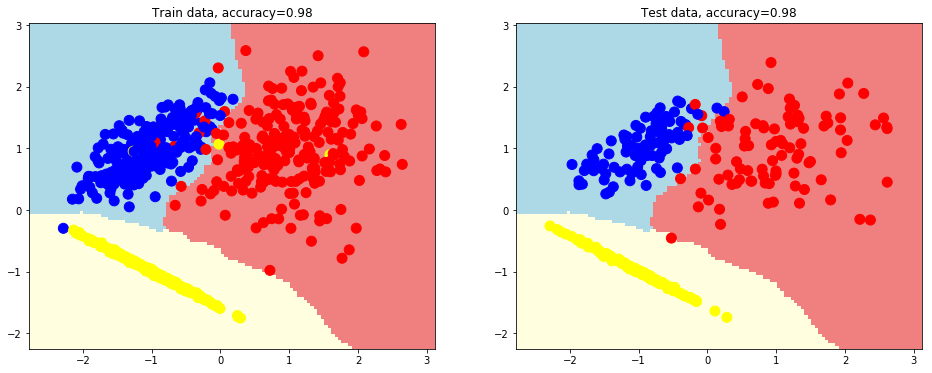

In [4]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels,
                          colors=colors, light_colors=light_colors):
    # fit model
    estimator.fit(train_data, train_labels)

    # set figure size
    plt.figure(figsize=(16, 6))

    # plot decision surface on the train data
    plt.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    plt.title(
        'Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))

    # plot decision surface on the test data
    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

    plt.show()

for i in [1, 3, 5, 10, 20, 30, 50]:
    print "k = " + str(i)
    plot_decision_surface(KNeighborsClassifier(), train_data,  train_labels, test_data, test_labels)

Считаем accuracy для разных значений k.

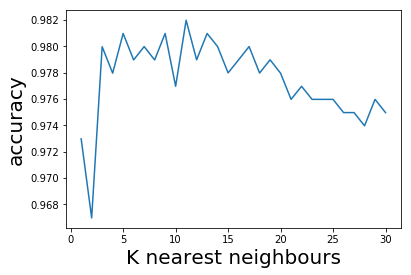

In [5]:
k_acc = []
for i in range(k_max+1)[1:]:
    Classifier = KNeighborsClassifier(i)
    k_acc.append(np.mean(cross_val_score(Classifier, Data[0], Data[1], cv=5)))

plt.plot(range(k_max+1)[1:], k_acc)
plt.xlabel('K nearest neighbours', fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.show()

Видим, что оптимальное значение лежит где-то в промежутке 5-15.

<h3>Задача 2</h3>

In [7]:
from sklearn import datasets
from sklearn import naive_bayes

Грузим датасеты, выводим первые строчки.

In [9]:
cancer = datasets.load_breast_cancer()
digits = datasets.load_digits()

print cancer.data[:3]
print digits.data[:3]

[[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
    1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
    2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
    8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
    5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
    2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
    1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02   1.32600000e+03
    8.47400000e-02   7.86400000e-02   8.69000000e-02   7.01700000e-02
    1.81200000e-01   5.66700000e-02   5.43500000e-01   7.33900000e-01
    3.39800000e+00   7.40800000e+01   5.22500000e-03   1.30800000e-02
    1.86000000e-02   1.34000000e-02   1.38900000e-02   3.53200000e-03
    2.49900000e+01   2.34100000e+01   1.58800000e+02   1.95600000e+03
    1.23800000e-01   1.86600000e-01   2.41600000e-01 

Сравниваем классификаторы. Для каждого датасета первая, вторая и третья цифра вывода - соответственно, бернуллевский, мультиномиальный и гауссовский классификаторы.

In [10]:
classifiers = [naive_bayes.BernoulliNB(), naive_bayes.MultinomialNB(), naive_bayes.GaussianNB()]
means = [[], []]
for i in range(3):
    means[0].append(cross_val_score(classifiers[i], cancer.data, cancer.target, cv=5).mean())
    means[1].append(cross_val_score(classifiers[i], digits.data, digits.target, cv=5).mean())

print "cancer:"
print means[0]
print "digits:"
print means[1]

cancer:
[0.62742593305117356, 0.89637552904963447, 0.9403770681031165]
digits:
[0.82477104598047846, 0.87147030254753344, 0.80652075555522984]


1) Максимальное качество на датасете brest_cancer = 0.94 <br>
2) Максимальное качество на датасете digits = 0.87<br>
3)  a - не верно<br>
    b - не верно <br>
    с - не верно<br>
    d - верно

<h3>Задача 3</h3>

In [2]:
from scipy.optimize import minimize

Генерируем данные.

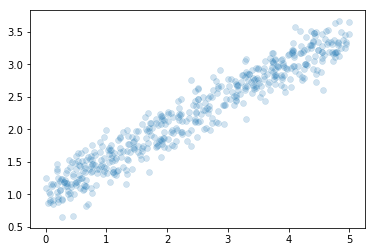

In [3]:
Data = [[],[]]
for i in range(500):
    Data[0].append(np.random.uniform(0, 5))
    Data[1].append(Data[0][-1]*0.5 + 1 + np.random.normal(scale=0.2))
plt.scatter(Data[0], Data[1], linewidths=0.5, alpha=0.2)
plt.show()

Аппроксимируем данные прямой ax + b, выводим коэффиценты а и b.

[ 0.52649422  0.7591943 ]


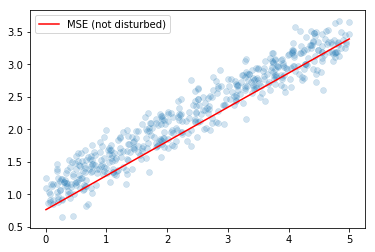

In [4]:
a = minimize(lambda a: np.mean(map(lambda i: (Data[1][i] - a[0]*Data[0][i] - a[1])**2, range(len(Data)))), [0, 0]).x
print a

plt.scatter(Data[0], Data[1], linewidths=0.5, alpha=0.2)
x = np.linspace(np.array(Data[0]).min(), np.array(Data[0]).max(), 100)
y = [a[0]*xx + a[1] for xx in x]
plt.plot(x, y, label='MSE (not disturbed)', color='r')
plt.legend()
plt.show()

Добавляем выбросы, ищем прямые для новой выборки, минимизируя MSE и MAE.

MSE:
[ 0.52649422  0.7591943 ]
MAE:
[ 0.62901141  0.35947445]


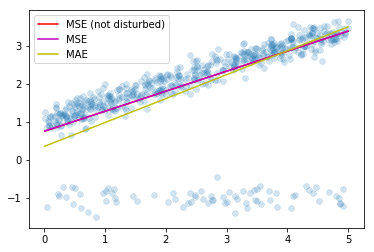

In [5]:
for i in range(75):
    Data[0].append(np.random.uniform(x[0], x[-1]))
    Data[1].append(-1 + np.random.normal(scale=0.2))

a_mse = minimize(lambda a: np.mean(map(lambda i: (Data[1][i] - a[0]*Data[0][i] - a[1])**2, range(len(Data)))), [0, 0]).x
a_mae = minimize(lambda a: np.mean(map(lambda i: np.abs(Data[1][i] - a[0]*Data[0][i] - a[1]), range(len(Data)))), [0, 0]).x
print "MSE:" 
print a_mse
print "MAE:"
print a_mae

y_mse = [a_mse[0]*xx + a_mse[1] for xx in x]
y_mae = [a_mae[0]*xx + a_mae[1] for xx in x]


plt.scatter(Data[0], Data[1], linewidths=0.5, alpha=0.2)
plt.plot(x, y, label='MSE (not disturbed)', color='r')
plt.plot(x, y_mse, label='MSE', color='m')
plt.plot(x, y_mae, label='MAE', color='y')
plt.legend()
plt.show()

Можем наблюдать, что MSE более устойчива к выбросам, чем MAE.

<h3>Теоретические задачи</h3>

![...](p1.jpg "задача 1")

![...](p2.jpg "задача 2")

![...](p3.jpg "задача 3")

In [2]:
import numpy as np
print np.array([1, 2, 3])**2

[1 4 9]
